# Week I: setting up a Python environment for data science

## Introduction

Throughout this course we are going to showcase a variety of machine learning algorithms. You will create experiments based on those algorithms on different datasets and reach you own conclusions. All instructions will be given in Python, hence a familiarity with the language is mandatory. 

In our first class, we're going to setup a Python environment together and discuss the best practices to follow. We'll finish the class with a short example of a simple machine learning algorithm.




## Logistics/administrative aspects 

Feel free to ask any questions: odedovadia@mail.tau.ac.il.

Office hours: right before the lesson (Wed. 14:00-15:00). Please coordinate beforehand.

Grade:
*   Final projects (in teams) - 50%
*   3 mandatory code chores  - 30%
*   Exam - 20%


## Why Python?

Python is currently by far the most dominant langauge in the field of data science:


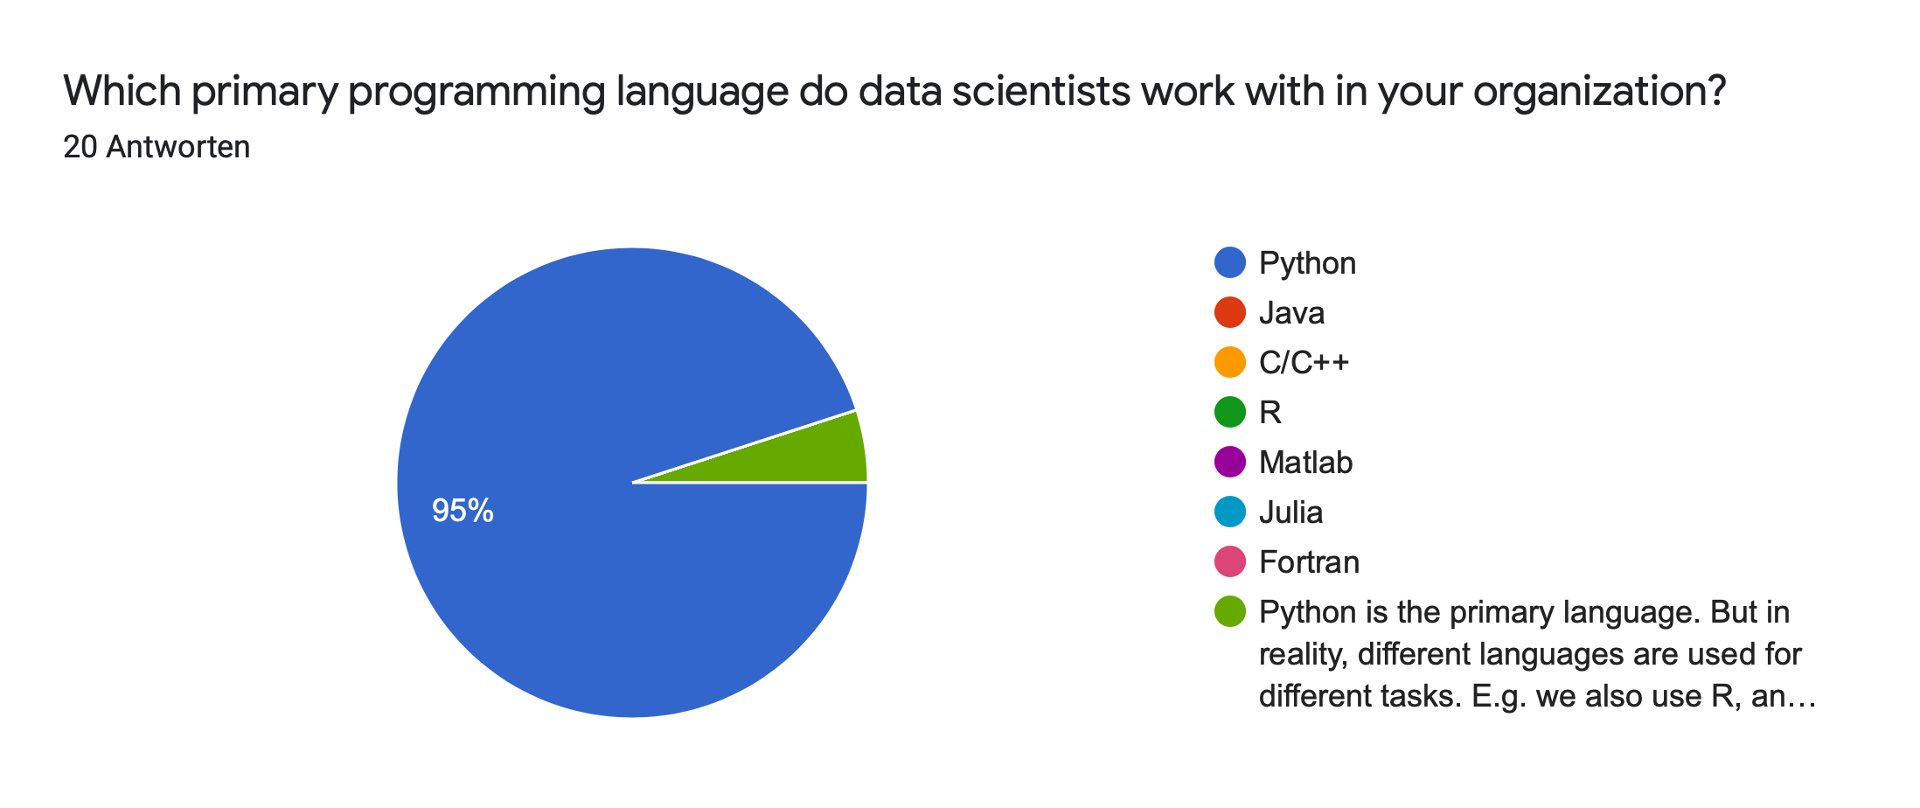


However, each of these langauges has its own specialities: SQL has a strong focus on databases, and R is very statitstics oriented. In comparison, Python is a [general purpose langage](https://en.wikipedia.org/wiki/General-purpose_programming_language), which makes it more versatile. Consequently, it can be used in practically any scenario. Moreover, it has one of the largest user bases in the world:

![Alt text](https://i.redd.it/xpc4w785i2j61.png)

Finally, some of the most useful packages for data science (such as Tensorflow or scikit-learn) are Python-based:




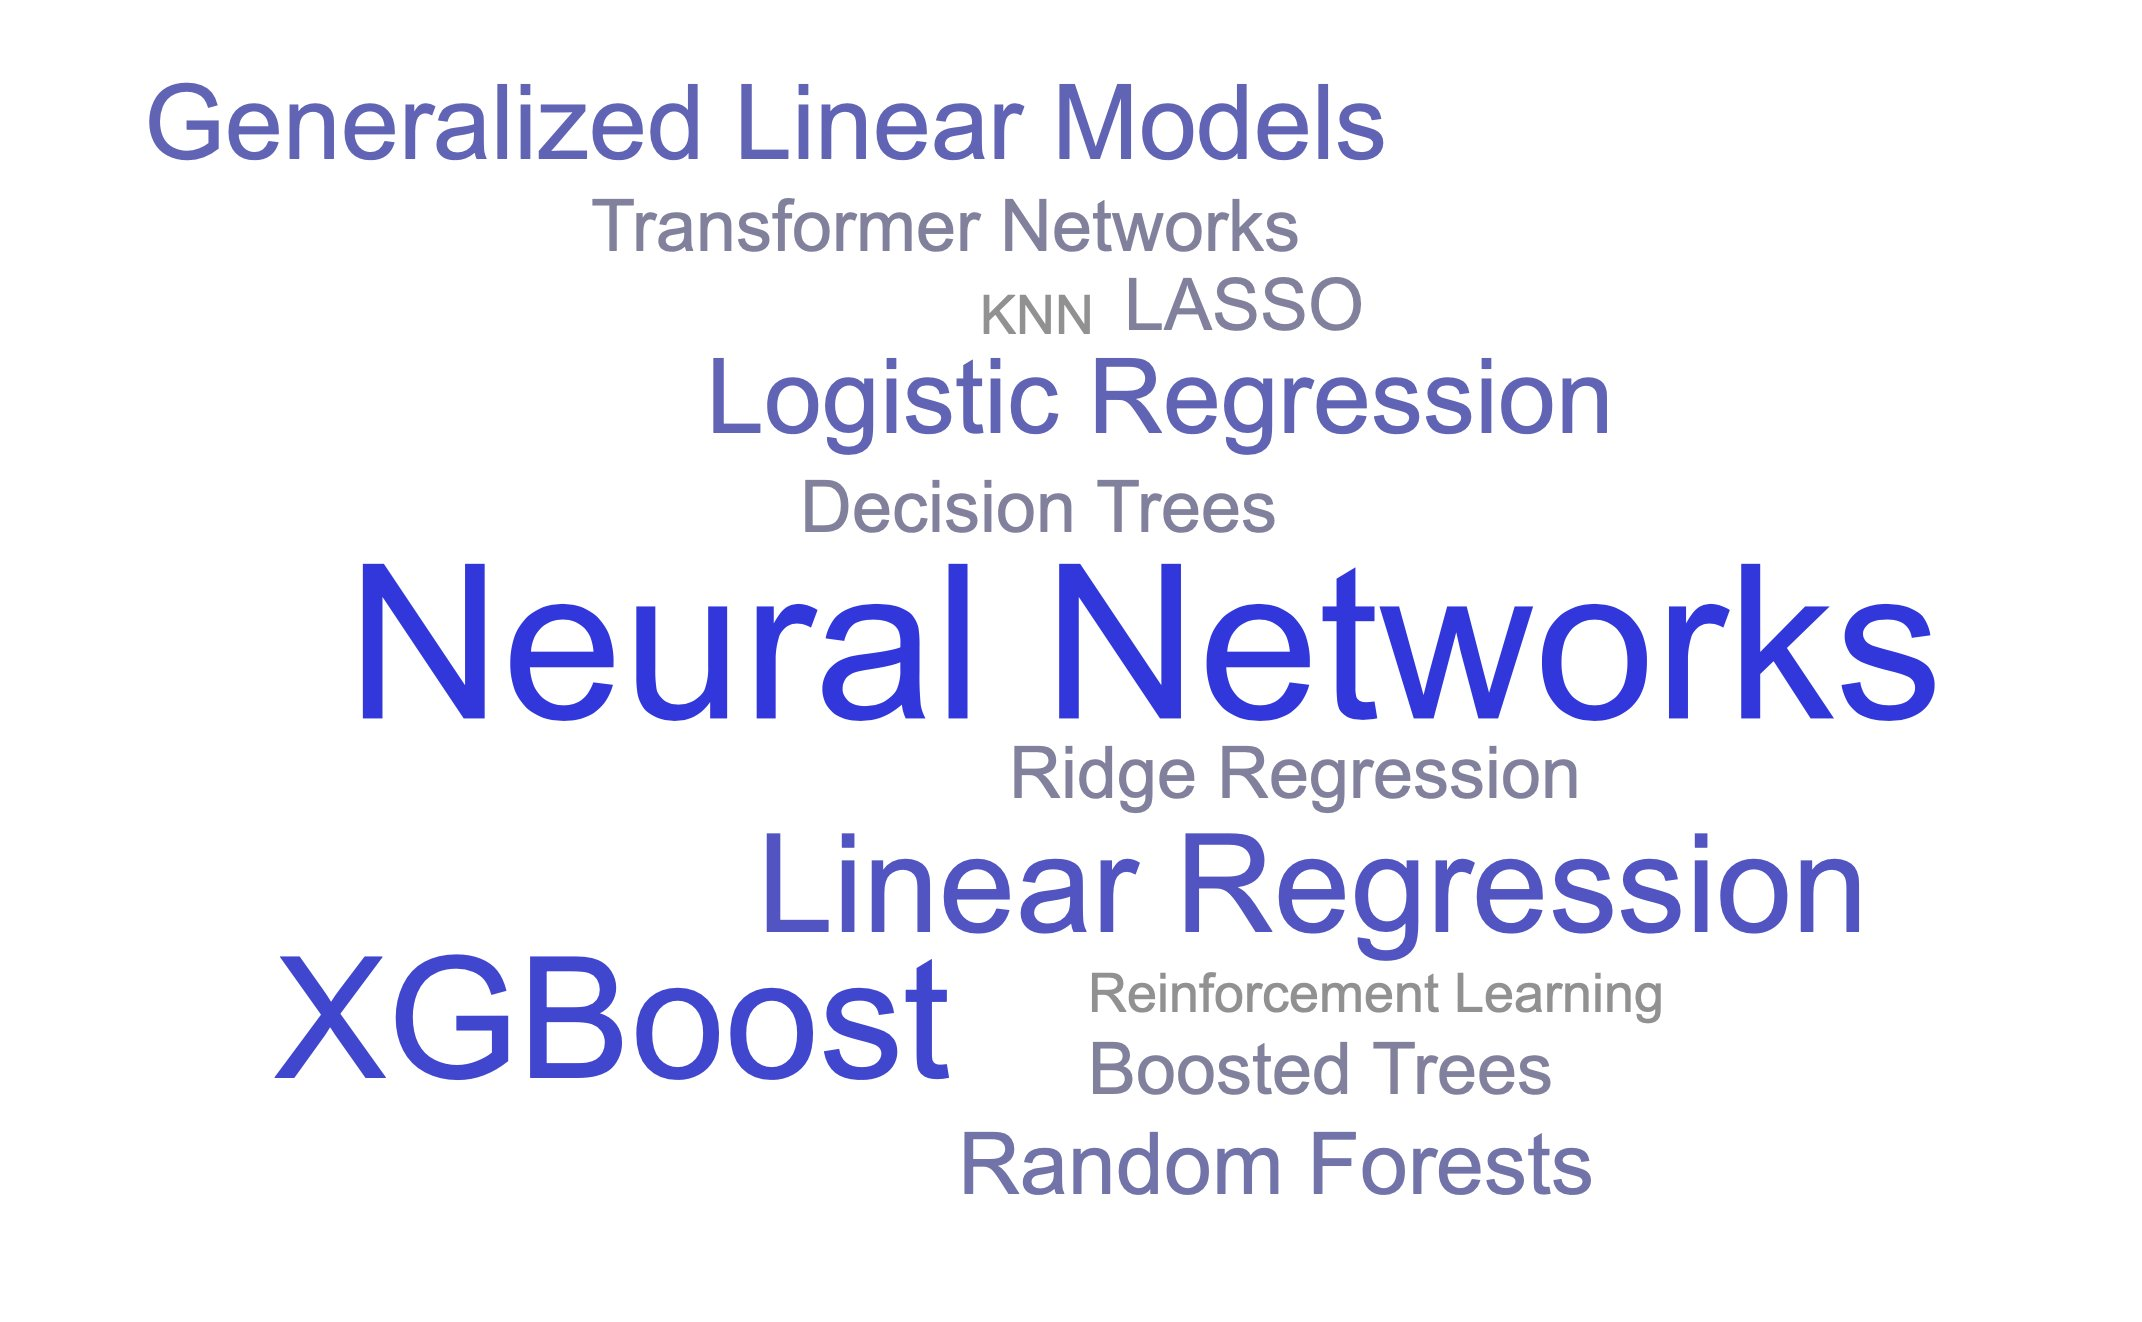

Due to the following reasons we chose to use Python exclusively in this course.


## Google Colab
Throughout this course we'll be using Google Colab as our framework. In their own words:

><h1>What is Colab?</h1>
>
>Colab, or "Colaboratory", allows you to write and execute Python in your >browser, with 
>- Zero configuration required
>- Free access to GPUs
>- Easy sharing
>
>Whether you're a **student**, a **data scientist** or an **AI researcher**, >Colab can make your work easier. Watch [Introduction to Colab](https://www.>youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## Installing packages

Much of the work in Python is dependent on off-the-shelf packages. Usually, when writing a Python program the first lines will include a list of import statements for all relevant packages. Some of these packages are included in the Python Standard Library, which means they're built-in and come with Python. However, most domain-specific packages are not included, and we'll have to download them. 

Our main tool for dealing with packages is pip. It's a package manager that allows us to download packages from online repositories, and then extract them from several file types - most notably .whl (wheel) files which are the commom choice for package creation in Python. We'll begin by upgrading pip:

In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 11.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


Google Colab already has a large amount of packages built-in, which saves us a lot of work. Just for the sake of future references we'll show a few examples.

Let's say that we'd like to install NumPy. It's the most useful package for mathematical computations, and we'll use it plenty of times throughout the course.

In [ ]:
!pip install numpy

pip also allows us to install a specific version of a package, for example:

In [ ]:
!pip install numpy==1.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Machine learning example
An integral part of being a data scientist is learning how to deal with different sorts of datasets. 
scikit-learn has a few built-in datasets. In this example we'll show how to prepare a wine classification dataset. The dataset contains 13 different features that describe 3 different wines. Our goal is to correctly predict the wine given a set of features. You can read more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).

### Data exploration

We'll begin by importing the required packages:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as notebook_tqdm

We'll procceed to load the wine dataset:

In [ ]:
data = datasets.load_wine()
print(type(data))

<class 'sklearn.utils.Bunch'>


Note that the type of the variable data is 'sklearn.utils.Bunch'. We'd like to convert it into a Pandas dataframe for the sake of convenience.

In [ ]:
features_df = pd.DataFrame(data.data, columns=data.feature_names)
features_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Now we can use standard Pandas methods to explore the attribues of the data:

In [ ]:
features_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


This dataframe includes only the features of each sample, and doesn't include labels. We'll load the labels and explore them:

In [ ]:
labels_df = pd.DataFrame(data.target, columns=["wine_class"])
labels_df

,wine_class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


We see there are 178 samples, just like in the feautres dataframe.

In [ ]:
labels_df["wine_class"].unique()

array([0, 1, 2])

As expected, there are indeed 3 different classes. 

In [ ]:
labels_df.groupby("wine_class").size()

wine_class
0    59
1    71
2    48
dtype: int64

In [ ]:
labels_df.groupby("wine_class").size()/labels_df.count()["wine_class"]

wine_class
0    0.331461
1    0.398876
2    0.269663
dtype: float64

The dataset is also quite balanced between the 3 classes.
We'll follow standard machine learning methodology and notations by splitting the data into training and testing datasets: 

In [ ]:
X, Y = features_df, labels_df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Cross validation

At this point our data is processed and ready to be used. We'll feed it into a random forrest algorithm and test the results using different hyperparameters. We'll evaluate our results using cross-validation. 

According to Random Forest theory, by increasing the number of trees in the ensemble we should get better results. 

We'll begin by setting a random seed:

In [ ]:
# No seed
np.random.rand()

0.46229392073692366

In [ ]:
# With fixed seed:
np.random.seed(42)
np.random.rand()

0.3745401188473625

We'll use K-fold cross validation:

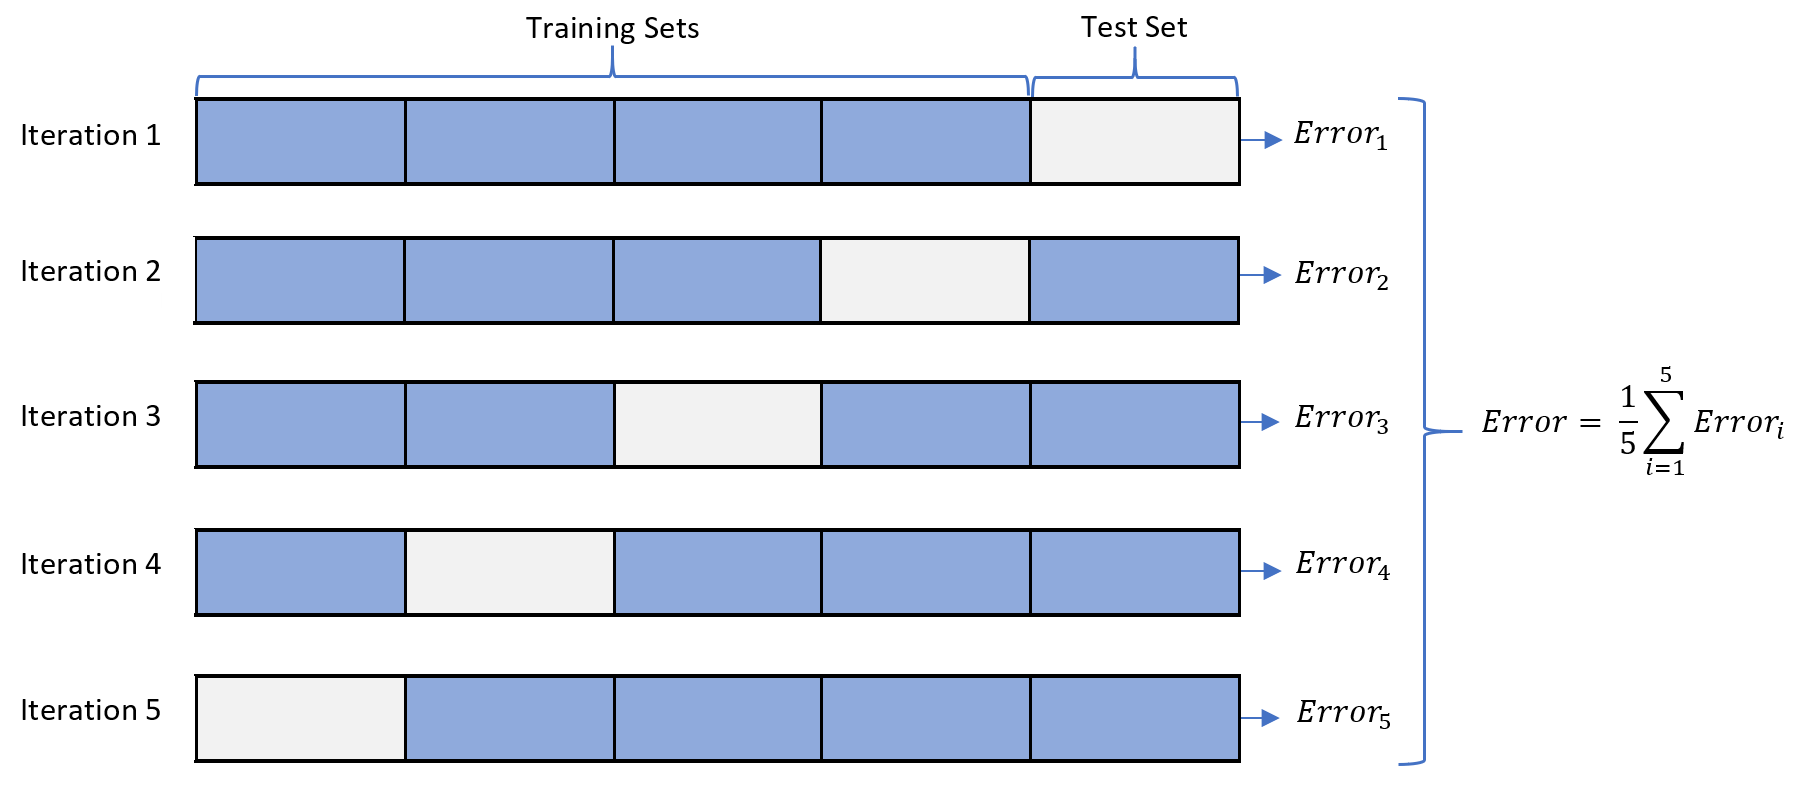

In [ ]:
# Setting a seed means we'll be able to replicate the same experiment since the randomization will stay the same.
np.random.seed(42)

# Cross-validating the data
kfold = KFold(n_splits=3)

### Random Forest

We'll use [sklearn's random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
models = []
cv_scores = []
for n in notebook_tqdm(range(1, 10)):
    # Creating the random forest model with n trees
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Computing the mean score over all k partitions
    cv_result = cross_val_score(model, X_train, Y_train.values.ravel(), cv=kfold, scoring="accuracy")
    cv_scores.append((n, cv_result.mean()))
    print('Full CV vector: ', cv_result, ' Mean score: ', cv_result.mean())
        
optimal_num_of_trees = sorted(cv_scores, key=lambda x: x[1], reverse=True)[0]
print('Optimal number of trees is: ', optimal_num_of_trees[0])

  0%|          | 0/9 [00:00<?, ?it/s]

Full CV vector:  [0.80952381 0.68292683 0.85365854]  Mean score:  0.7820363917924893
Full CV vector:  [0.85714286 0.73170732 0.7804878 ]  Mean score:  0.7897793263646923
Full CV vector:  [0.88095238 0.82926829 0.82926829]  Mean score:  0.8464963221060781
Full CV vector:  [0.88095238 0.85365854 0.82926829]  Mean score:  0.8546264034068911
Full CV vector:  [0.9047619  0.92682927 0.87804878]  Mean score:  0.9032133178474643
Full CV vector:  [0.9047619  0.97560976 0.85365854]  Mean score:  0.9113433991482771
Full CV vector:  [0.92857143 0.95121951 0.87804878]  Mean score:  0.9192799070847851
Full CV vector:  [0.9047619  0.95121951 0.90243902]  Mean score:  0.9194734804490902
Full CV vector:  [0.9047619  0.97560976 0.92682927]  Mean score:  0.9357336430507162
Optimal number of trees is:  9


Let's plot it:

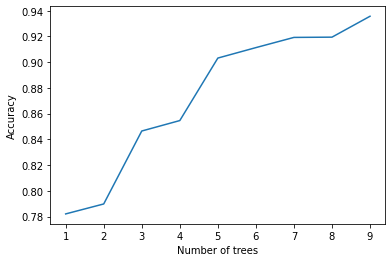

In [ ]:
x_index = np.array([cv[0] for cv in cv_scores])
y_value = np.array([cv[1] for cv in cv_scores])

plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(x_index, y_value)

Let's use linear regression to find the overall trend in the data:

In [ ]:
regr = LinearRegression()
regr.fit(x_index.reshape(-1, 1), y_value)
regression_line = regr.predict(x_index.reshape(-1, 1))
regression_line

array([0.7931432 , 0.8132458 , 0.83334839, 0.85345098, 0.87355358,
       0.89365617, 0.91375876, 0.93386136, 0.95396395])

And plot the regression:

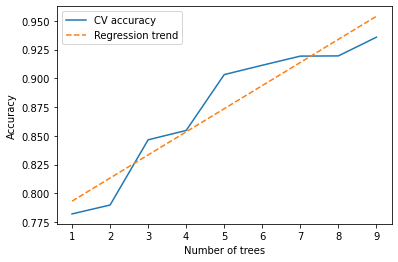

In [ ]:
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(x_index, y_value, label='CV accuracy')
plt.plot(x_index, regression_line, '--', label='Regression trend')
plt.legend()

Let's examine some more metrics related to the best model:

In [ ]:
model = RandomForestClassifier(n_estimators=optimal_num_of_trees[0], random_state=42)
model.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(n_estimators=9, random_state=42)

Predict on test set:

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



And we see that we have a near-perfect model in this case. Let's examine its confusion matrix:

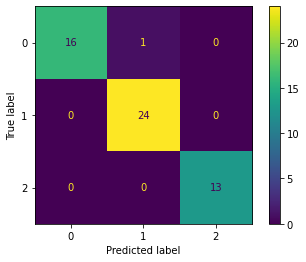

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()